In [1]:
import sys
import pandas as pd
sys.path.append('code')
from tasks.link_prediction import LinkPredictor
from dataset import GraphDataset

In [2]:
data_path = 'data'
dataset = 'Router'

# Load dataset
graph_data = GraphDataset(data_path)
graph_data.load_graph(dataset)
graph, node_subjects = graph_data.graph, graph_data.node_subjects

if node_subjects.empty:
        node_subjects = None

# Calculate graph statistics
num_edges = graph.number_of_edges()
num_nodes = graph.number_of_nodes()
print("\nGraph Loaded:")
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Graph Loaded:
Number of nodes: 5022
Number of edges: 6258


In [3]:
# run link prediction
clf = LinkPredictor(graph=graph)
df_result = pd.DataFrame()
for method in ['DNE', 'GraRep', 'HOPE', 'NetMF', 'LLE', 'N2V', 'SVD']:
    result = clf.train_and_evaluate(method, node_subjects, cv_fold=5, n_trials=1)
    df_result = pd.concat([df_result, result])

Generate DNE embeddings for Train Graph


Epoch 10/10 | Loss: 0.0438: 100%|██████████| 10/10 [00:44<00:00,  4.47s/it]


trial:  0 score:  {'auc_roc': 0.9003, 'auc_pr': 0.8967, 'acc': 0.8104, 'f1': 0.8036, 'bcc': 0.8104, 'method': 'DNE', 'trial': 0}
Generate GraRep embeddings for Train Graph
trial:  0 score:  {'auc_roc': 0.8341, 'auc_pr': 0.8463, 'acc': 0.7568, 'f1': 0.737, 'bcc': 0.7568, 'method': 'GraRep', 'trial': 0}
Generate HOPE embeddings for Train Graph
trial:  0 score:  {'auc_roc': 0.7209, 'auc_pr': 0.7843, 'acc': 0.728, 'f1': 0.6654, 'bcc': 0.728, 'method': 'HOPE', 'trial': 0}
Generate NetMF embeddings for Train Graph
Running NetMF for a small window size...
Compute matrix %d-th power 1
Compute matrix %d-th power 2
Compute matrix %d-th power 3
Compute matrix %d-th power 4
Compute matrix %d-th power 5
trial:  0 score:  {'auc_roc': 0.6801, 'auc_pr': 0.6217, 'acc': 0.6376, 'f1': 0.6338, 'bcc': 0.6376, 'method': 'NetMF', 'trial': 0}
Generate LLE embeddings for Train Graph
trial:  0 score:  {'auc_roc': 0.7058, 'auc_pr': 0.6367, 'acc': 0.6632, 'f1': 0.6429, 'bcc': 0.6632, 'method': 'LLE', 'trial': 0}


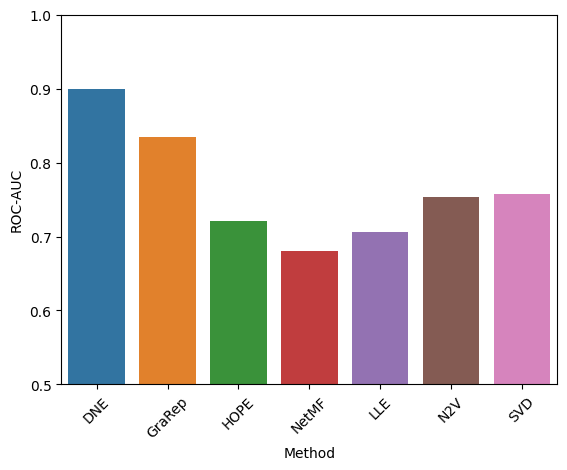

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='method', y='auc_roc', data=df_result, hue='method')
plt.xlabel('Method')
plt.ylabel('ROC-AUC')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()